In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib 
matplotlib.font_manager._rebuild()

# # 1. 데이터 전처리

### # 1. 서울시 자치구별 5대 범죄 발생 수

In [9]:
crime_2018 = pd.read_table('./data/seoul_crime/crime_18.txt', header=1, sep='\t',  thousands=',')


In [10]:
col = ['기간','자치구', '합계발생', '합계검거', '살인발생', '살인검거', '강도발생', '강도검거', '강간강제추행발생',
       '강간강제추행검거', '절도발생', '절도검거', '폭력발생', '폭력검거']

crime_2018.columns = col 

crime_2018.drop(['합계검거', '살인검거', '강도검거', '강간강제추행검거','절도검거','폭력검거'], 
                 axis=1, inplace=True)

crime_2018.set_index('자치구', inplace=True)

crime_2018.head()

,기간,합계발생,살인발생,강도발생,강간강제추행발생,절도발생,폭력발생
자치구,,,,,,,
합계,2018,101948,143,143,6412,39175,56075
종로구,2018,3690,6,3,236,1483,1962
중구,2018,4030,2,11,207,1855,1955
용산구,2018,3411,1,3,331,1096,1980
성동구,2018,2457,2,5,126,999,1325


In [11]:
crime_test1 = pd.pivot_table(crime_2018,index=['자치구'], values='합계발생', aggfunc=[sum])
crime_test1 = crime_2018.sort_values(('합계발생'), ascending= False)

crime_test1.to_pickle('crime.pkl')



In [12]:
crime_test1.drop(['기간','살인발생', '강도발생', '강간강제추행발생','절도발생','폭력발생'], 
                 axis=1, inplace=True)

crime_test1.head()

,합계발생
자치구,
합계,101948
강남구,7513
영등포구,5840
송파구,5807
마포구,5172


### # 2. 서울시 자치구별  주민등록인구

In [16]:
raw_pop18 = pd.read_table('./data/seoul_pop/pop_18.txt', header=2, sep='\t', thousands=',')

In [17]:
raw_pop18.drop(['기간', '세대','남자','여자','계.1','남자.1','여자.1','계.2','남자.2','여자.2','세대당인구','65세이상고령자'], axis=1, inplace=True)
raw_pop18.set_index('자치구', inplace=True)


# # 2. Merge

In [18]:
crime_pop_18 = pd.merge(crime_test1, raw_pop18, on='자치구')

crime_pop_18 = crime_pop_18.drop("합계", axis=0) 
crime_pop_18 = crime_pop_18.rename({'계': "총인구"}, axis='columns')
crime_pop_18.columns = ["총 범죄발생수", "총 인구수"]

crime_pop_18.head()

,총 범죄발생수,총 인구수
자치구,,
강남구,7513,547453
영등포구,5840,403600
송파구,5807,673507
마포구,5172,386359
관악구,5026,520040


# # 3. 상관관계

### # 1. 상관계수

In [9]:
crime_pop_18_corr = crime_pop_18.corr(method='pearson')
crime_pop_18_corr

,총 범죄발생수,총 인구수
총 범죄발생수,1.000000,0.507629
총 인구수,0.507629,1.000000


##### 주민등록인구 수와 5대 범죄 발생 건수는 비교적 높은 상관관계를 나타낸다

### # 2. 시각화

In [10]:
tmp = crime_pop_18.reset_index().rename(columns={"index": "자치구"})

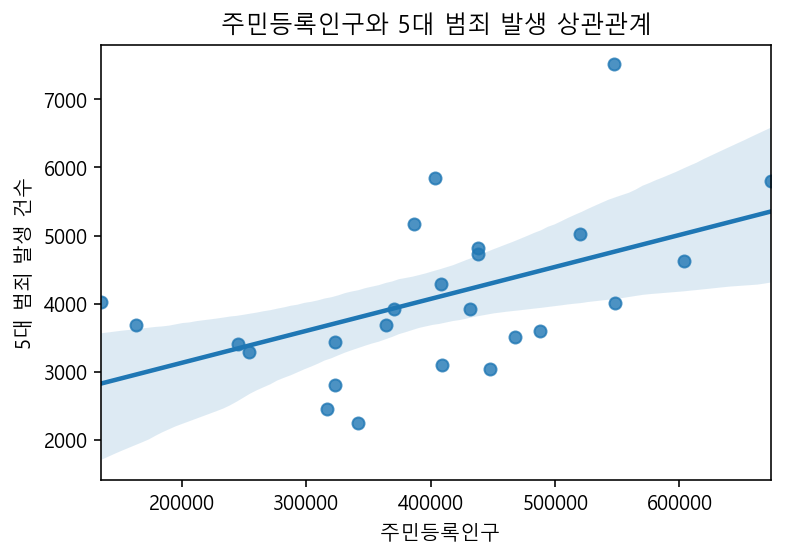

In [11]:
graph = sns.regplot(x=tmp["총 인구수"], y=tmp["총 범죄발생수"])
graph.set_xlabel(" 주민등록인구")
graph.set_ylabel("5대 범죄 발생 건수")
graph.set_title('주민등록인구와 5대 범죄 발생 상관관계')

plt.show()


##### 데이터프레임 저장

In [12]:
crime_test1.to_pickle("crime_test1.pkl")

In [13]:
raw_pop18.to_pickle("pop_test1.pkl")